58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Mean Squared Error (MSE): 13.7343
R² Score: 0.3199


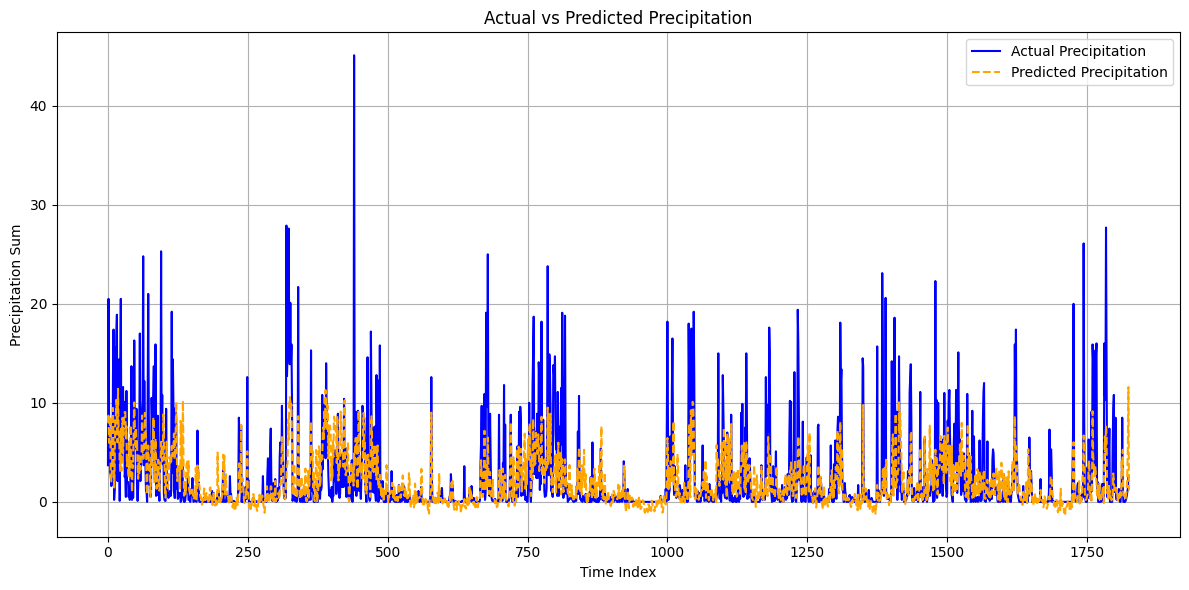

In [2]:
import pandas as pd
import numpy as np
from keras.models import load_model
import joblib
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# -----------------------------
# Load data from CSV
# -----------------------------
df = pd.read_csv(r"C:\ML_work\Data Engineering work\uasin_gishu_weather_data.csv", parse_dates=["time"])
df = df.sort_values(by='time')

# -----------------------------
# Handle missing values
# -----------------------------
features = ['temperature_2m_max', 'temperature_2m_min', 'windspeed_10m_max']
target = 'precipitation_sum'

# Fill missing values with mean
df[features + [target]] = df[features + [target]].fillna(df[features + [target]].mean())

# -----------------------------
# Prepare features and target
# -----------------------------
X = df[features].values
y_true = df[target].values

# -----------------------------
# Load scaler and transform data
# -----------------------------
scaler = joblib.load(r"C:\ML_work\Data Engineering work\weather_scaler.pkl")
X_scaled = scaler.transform(X)

# Reshape for CNN input: (samples, timesteps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# -----------------------------
# Load the trained model (fix TypeError by compile=False)
# -----------------------------
model = load_model(r"C:\ML_work\Data Engineering work\cnn_weather_model.h5", compile=False)

# -----------------------------
# Predict and evaluate
# -----------------------------
y_pred = model.predict(X_scaled).flatten()

# Compute metrics
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# -----------------------------
# Plot actual vs predicted
# -----------------------------
plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual Precipitation', color='blue')
plt.plot(y_pred, label='Predicted Precipitation', color='orange', linestyle='--')
plt.title("Actual vs Predicted Precipitation")
plt.xlabel("Time Index")
plt.ylabel("Precipitation Sum")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
